In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname='/Users/hoon/Library/Fonts/NanumSquareRegular.ttf').get_name()
plt.rc("font", family=font_name)
import matplotlib as mpl
mpl.rcParams["axes.unicode_minus"] = False

import time
import re

In [20]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV # 데이터 나누기, 점검 및 훈련
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve # 평가지표
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler, StandardScaler # Feature Scaling

from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor

from sklearn.datasets import load_iris, load_boston, load_breast_cancer # 데이터

import mglearn # 그래프

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import LinearSVC

import statsmodels.api as sm


#### 3. 맨하튼 집값

In [ ]:
"""
rental_id	rental ID
rent	임대료 ($)
bedrooms	침실수
bathrooms	화장실수
size_sqft	평수(feet)
min_to_subway	지하철과의 거리 (minutes)
floor	층수
building_age_yrs	건물 연령
no_fee	중계수수료 (0 for fee, 1 for no fee)
has_roofdeck	옥상 (o for no, 1 for yes)
has_washer_dryer	세탁기/건조기 (0/1)
has_doorman	도어맨 (0/1)
has_elevator	엘리베이터 (0/1)
has_dishwasher	식기세척기 (0/1)
has_patio	안마당(patio) (0/1)
has_gym	헬스장(gym) (0/1)
neighborhood	이웃 (ex: 한인타운)
submarket	submarket (ex: North Brooklyn)
borough	borough (ex: Brooklyn)
"""

In [21]:
#### 주말 과제 !!!
df = pd.read_csv("data/manhattan.csv")
df
#데이터 형태 및 결측치 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3539 entries, 0 to 3538
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rental_id         3539 non-null   int64  
 1   rent              3539 non-null   int64  
 2   bedrooms          3539 non-null   float64
 3   bathrooms         3539 non-null   int64  
 4   size_sqft         3539 non-null   int64  
 5   min_to_subway     3539 non-null   int64  
 6   floor             3539 non-null   float64
 7   building_age_yrs  3539 non-null   int64  
 8   no_fee            3539 non-null   int64  
 9   has_roofdeck      3539 non-null   int64  
 10  has_washer_dryer  3539 non-null   int64  
 11  has_doorman       3539 non-null   int64  
 12  has_elevator      3539 non-null   int64  
 13  has_dishwasher    3539 non-null   int64  
 14  has_patio         3539 non-null   int64  
 15  has_gym           3539 non-null   int64  
 16  neighborhood      3539 non-null   object 


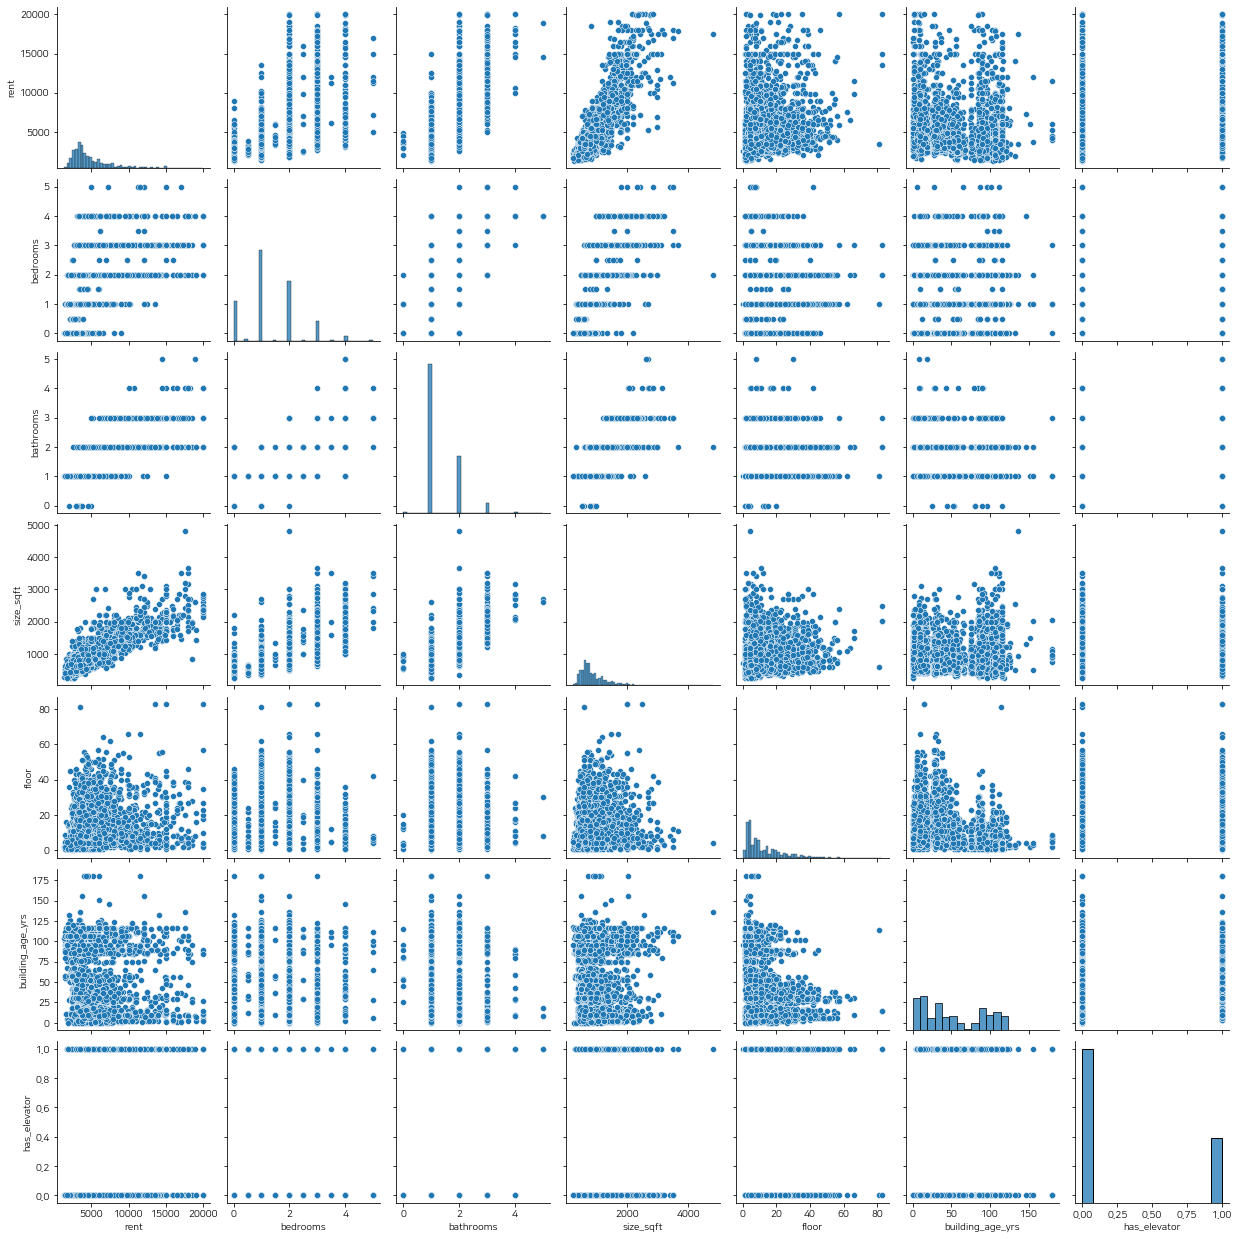

In [24]:
#### 시각화
sns.pairplot(df[["rent", "bedrooms", "bathrooms", "size_sqft", "floor", "building_age_yrs", "has_elevator"]])

<AxesSubplot:>

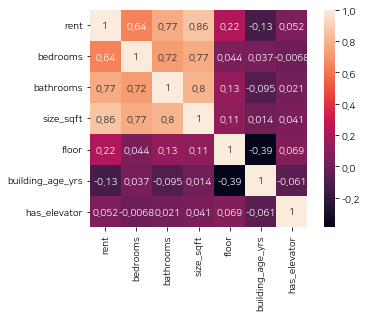

In [27]:
cols = ["rent", "bedrooms", "bathrooms", "size_sqft", "floor", "building_age_yrs", "has_elevator"]
heat = np.corrcoef(df[cols].T)
heat

sns.heatmap(heat, annot=True, yticklabels=cols, xticklabels=cols, square=True)

In [ ]:
#### 설명계수(훈련 결과와 테스트 결과 비교)
data = np.array(df.iloc[:, 2:-2])
target = np.array(df.iloc[:, 1])

print(df.iloc[:, 2:-2])
print(data.shape)
print(target.shape)


      bedrooms  bathrooms  size_sqft  min_to_subway  floor  building_age_yrs  \
0          0.0          1        480              9    2.0                17   
1          2.0          2       2000              4    1.0                96   
2          1.0          1        916              2   51.0                29   
3          1.0          1        975              3    8.0                31   
4          2.0          2       4800              3    4.0               136   
...        ...        ...        ...            ...    ...               ...   
3534       1.0          1        532              3    8.0                16   
3535       2.0          2        988              5   10.0                 9   
3536       0.0          1        250              2    5.0                96   
3537       1.0          1        651              6    5.0                14   
3538       1.0          1        816              4   11.0                 9   

      no_fee  has_roofdeck  has_washer_

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

lr = LinearRegression()
lr.fit(X_train, y_train)

print("기울기 : {0}, 절편 : {1}".format(lr.coef_, lr.intercept_))
print("훈련 설명력 : {}".format(lr.score(X_train, y_train)))
print("테스트 설명력 : {}".format(lr.score(X_test, y_test)))
# 입력값이 13개이어야 함!!!!!! 결국 단일선형회귀분석으로
# 다른 변수 디폴트값으로 입력하고 방만 입력하게 하는 것도 하나의 방법
print("예측값 : {}".format(lr.predict([[1, 1, 620, 16, 1, 98, 1, 0, 1, 0, 0, 1, 1, 0]])))

(2654, 14) (885, 14) (2654,) (885,)
기울기 : [-338.54902284 1132.014659      5.05693696  -13.87994946   24.83770517
   -6.91751106  -96.98784469   20.7549017    62.87554775 -129.71551043
  144.88575836   40.34567557 -211.98265742    9.93131461], 절편 : -534.5549517410345
훈련 설명력 : 0.7825394472458302
테스트 설명력 : 0.7667047614204301
예측값 : [2313.30475109]


In [ ]:
#### 필요한 경우 릿지나 라쏘 활용
ridge01 = Ridge(alpha=10).fit(X_train, y_train) #alpha = 1.0이 디폴트. Ridge()에 넣어주면 됨.

print("릿지")
print("훈련 설명력 : {}".format(ridge01.score(X_train, y_train)))
print("테스트 설명력 : {}".format(ridge01.score(X_test, y_test)))
print("예측값 : {}".format(ridge01.predict([[1, 1, 620, 16, 1, 98, 1, 0, 1, 0, 0, 1, 1, 0]])))

print("="*50)

lasso = Lasso(10).fit(X_train, y_train)

print("라쏘")
print("훈련 설명력 : {}".format(lasso.score(X_train, y_train)))
print("테스트 설명력 : {}".format(lasso.score(X_test, y_test)))
print("사용한 변수의 수: {}".format(np.sum(lasso.coef_ != 0)))
print("예측값 : {}".format(lasso.predict([[1, 1, 620, 16, 1, 98, 1, 0, 1, 0, 0, 1, 1, 0]])))


#결론 : 릿지, 랏소는 큰 스코어 차이가 없음. 예상치도 크게 달라지지 않음

릿지
훈련 설명력 : 0.7825194944701263
테스트 설명력 : 0.766587718710398
예측값 : [2332.00177256]
훈련 설명력 : 0.7818923046401978
테스트 설명력 : 0.766422491642249
사용한 변수의 수: 9
예측값 : [2473.92736975]


분석에 따른 예측값 : 2.901994372142104


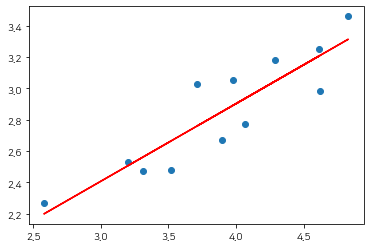

In [17]:
from scipy import stats

y = [2.48, 2.27, 2.47, 2.77, 2.98, 3.05, 3.18, 3.46, 3.03, 3.25, 2.67, 2.53]
X = [3.52, 2.58, 3.31, 4.07, 4.62, 3.98, 4.29, 4.83, 3.71, 4.61, 3.90, 3.20]

# 연구가설 채택
result = stats.linregress(X, y)
result

slope=np.array(0.4956032360182905)
intercept=np.array(0.9195814280689418)

# 그래프
plt.scatter(X, y)
plt.plot(X, slope*X+intercept, c='red')

# 생산량이 4일 때?
exp = slope*4+intercept
print("분석에 따른 예측값 :", exp)

In [9]:
y = [2.48, 2.27, 2.47, 2.77, 2.98, 3.05, 3.18, 3.46, 3.03, 3.25, 2.67, 2.53]
X = [3.52, 2.58, 3.31, 4.07, 4.62, 3.98, 4.29, 4.83, 3.71, 4.61, 3.90, 3.20]


result = stats.linregress(X, y)
result

### 머신러닝

X_arr = np.array(X)
X_arr = X_arr.reshape(-1, 1) # 2차원 배열 자료형으로 바꿔주기

lr = LinearRegression()
lr.fit(X_arr, y)

print("기울기 : {0}, 절편 : {1}".format(lr.coef_, lr.intercept_))
print("설명력 : {}".format(lr.score(X_arr, y)))

기울기 : [0.49560324], 절편 : 0.9195814280689416
설명력 : 0.7973123992441478


In [14]:
lr.coef_

array([0.49560324])